In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/marvel.csv', index_col=0)
#  exitem dois Ids para a Jean Grey, estamos padronizando esse Id
df = df.replace(1009496, 1009327)
df = df[df['Alignment_x'] == 'good']

In [3]:
relations_to_comics = {}

comics = df['comicID'].unique()

for i in comics:
    relations_to_comics[i] = []

In [4]:
chars = df['characterID'].unique()

for i in range(len(df)):
    comicID, charID = df.iloc[i, 0:2]
    if charID not in relations_to_comics[comicID]:
        relations_to_comics[comicID].append(charID)

In [5]:
temp = []
for n in relations_to_comics:
    temp.append(relations_to_comics[n])

In [6]:
import itertools
connections = []

for i in temp: 
    for j in list(itertools.combinations(i, 2)): 
        if j not in connections:
            connections.append(j)

In [7]:
from iteration_utilities import duplicates
list(duplicates(connections))

[]

In [8]:
from collections import Counter
c1 = Counter(i[0] for i in connections)
c2 = Counter(i[1] for i in connections)

union = {}

for i in c1:
    union[i] = c1[i] + c2[i]

for i in union:
    df.loc[df.characterID == i, 'ConnAmnt'] = union[i]

In [9]:
df.to_csv("marvel_connections_calculated_good.csv")

Não precisa rodar a parte de cima de novo, demora demais. O resultado anterior foi salvo no arquivo ```marvel_connections_calculated_good.csv```.

In [10]:
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='ConnAmnt', ylabel='Probability'>

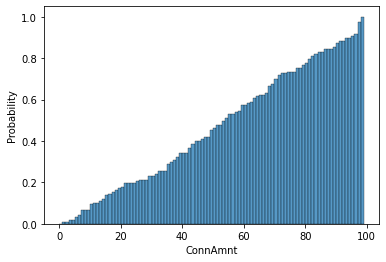

In [11]:
result_df = pd.read_csv('marvel_connections_calculated_good.csv', index_col=0)
df_plot = result_df.drop_duplicates(subset=['name'], keep='first')
sns.histplot(df_plot, x='ConnAmnt', common_norm = True, stat='probability', cumulative=True, bins=[i for i in range(100)])

In [12]:
result_df = result_df[result_df['ConnAmnt'] > 0]

In [13]:
relations_to_comics = {}

comics = result_df['comicID'].unique()

for i in comics:
    relations_to_comics[i] = []

In [14]:
chars = result_df['characterID'].unique()

for i in range(len(result_df)):
    comicID, charID = result_df.iloc[i, 0:2]
    if charID not in relations_to_comics[comicID]:
        relations_to_comics[comicID].append(charID)

In [15]:
temp = []
for n in relations_to_comics:
    temp.append(relations_to_comics[n])

In [16]:
import itertools
connections = []

for i in temp: 
    for j in list(itertools.combinations(i, 2)): 
        if j not in connections:
            connections.append(j)

In [17]:
result_df = result_df.drop_duplicates(subset=['name'], keep='first')
names = list(result_df['name'])
ids = list(result_df['characterID'])
connections_amount = list(result_df['ConnAmnt'])

len(ids), len(names)

(135, 135)

In [18]:
from unidecode import unidecode
with open('marvel.gml', 'w') as file:

        # Primeira linha, que abre os colchetes da rede.
        file.write('graph [\n')

        # Segunda linha, que indica se a rede é dirigida (1) ou não (0).
        file.write('  directed 0\n')

        # Colchetes de cada nó. Você sempre precisa colocar um id (inteiro
        # ou string) e depois pode colocar os atributos adicionais que
        # quiser, contanto que sejam inteiros, floats ou strings. Se forem
        # strings, não esqueça as aspas duplas (isso vale para o id também).
        # Não esqueça também da indentação. Ela não é necessária mas ajuda
        # a deixar mais legível.
        #
        # O módulo unidecode converte todo caractere não-ASCII para o
        # caractere ASCII mais próximo. Isso é necessário porque a
        # especificação do formato gml exige que ele seja ASCII.
        for i in range(len(names)):
            file.write('  node [\n')
            file.write('    id {}\n'.format(ids[i]))
            file.write('    name "{}"\n'.format(unidecode(names[i])))
            file.write('    amount "{}"\n'.format(connections_amount[i]))
            file.write('  ]\n')

        # Colchetes de cada aresta. Você sempre precisa colocar um source
        # e um target (ids de nós) e depois pode colocar os atributos
        # adicionais que quiser, contanto que sejam inteiros, floats ou
        # strings. Se forem strings, não esqueça as aspas duplas (isso
        # vale para o source e o target também). Não esqueça também da
        # indentação. Ela não é necessária mas ajuda a deixar mais legível.
        for (n, m) in connections:
            file.write('  edge [\n')
            file.write('    source {}\n'.format(n))
            file.write('    target {}\n'.format(m))
            file.write('  ]\n')

        # Última linha, que fecha os colchetes da rede.
        file.write(']\n')